
Research question: Do neural networks outperform traditional machine learning models in predicting diabetes?




In [ ]:
#import libraries

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, recall_score, f1_score

# regression library
from sklearn.linear_model import LinearRegression, LassoCV, RidgeCV
from sklearn.model_selection import cross_val_score

#logistic library
from sklearn.linear_model import LogisticRegressionCV

# KNN
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score


#metric library
from sklearn.metrics import r2_score, mean_squared_error,accuracy_score, confusion_matrix, classification_report

In [ ]:
# import data

diabetes = pd.read_csv("/content/diabetes_dataset.csv")

i. Explain the exploratory data analysis that you conducted, What was done to visualize yourdata and split your data for training and testing?


In [ ]:
# find how many rows and columns are in the dataset
# find the type of the entries and whether there are missing values.
diabetes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 31 columns):
 #   Column                              Non-Null Count   Dtype  
---  ------                              --------------   -----  
 0   age                                 100000 non-null  int64  
 1   gender                              100000 non-null  object 
 2   ethnicity                           100000 non-null  object 
 3   education_level                     100000 non-null  object 
 4   income_level                        100000 non-null  object 
 5   employment_status                   100000 non-null  object 
 6   smoking_status                      100000 non-null  object 
 7   alcohol_consumption_per_week        100000 non-null  int64  
 8   physical_activity_minutes_per_week  100000 non-null  int64  
 9   diet_score                          100000 non-null  float64
 10  sleep_hours_per_day                 100000 non-null  float64
 11  screen_time_hours_per_day  

In [ ]:
# look at the first 5 rows

diabetes.head()

,age,gender,ethnicity,education_level,income_level,employment_status,smoking_status,alcohol_consumption_per_week,physical_activity_minutes_per_week,diet_score,...,hdl_cholesterol,ldl_cholesterol,triglycerides,glucose_fasting,glucose_postprandial,insulin_level,hba1c,diabetes_risk_score,diabetes_stage,diagnosed_diabetes
0,58,Male,Asian,Highschool,Lower-Middle,Employed,Never,0,215,5.7,...,41,160,145,136,236,6.36,8.18,29.6,Type 2,1
1,48,Female,White,Highschool,Middle,Employed,Former,1,143,6.7,...,55,50,30,93,150,2.00,5.63,23.0,No Diabetes,0
2,60,Male,Hispanic,Highschool,Middle,Unemployed,Never,1,57,6.4,...,66,99,36,118,195,5.07,7.51,44.7,Type 2,1
3,74,Female,Black,Highschool,Low,Retired,Never,0,49,3.4,...,50,79,140,139,253,5.28,9.03,38.2,Type 2,1
4,46,Male,White,Graduate,Middle,Retired,Never,1,109,7.2,...,52,125,160,137,184,12.74,7.20,23.5,Type 2,1


In [ ]:
# Since there are multiple categorical variables, it is necessary to transform them into numerical data

# First find which columns have categorical data
categorical_cols = diabetes.select_dtypes(include=['object']).columns
print("Categorical Columns:\n", list(categorical_cols), "\n")

# Then, look at what categories are in each
for col in categorical_cols:
    print(f"Column: {col}")
    print("Number of unique categories:", diabetes[col].nunique())
    print("Categories:", diabetes[col].unique())
    print("-" * 50)

Categorical Columns:
 ['gender', 'ethnicity', 'education_level', 'income_level', 'employment_status', 'smoking_status', 'diabetes_stage'] 

Column: gender
Number of unique categories: 3
Categories: ['Male' 'Female' 'Other']
--------------------------------------------------
Column: ethnicity
Number of unique categories: 5
Categories: ['Asian' 'White' 'Hispanic' 'Black' 'Other']
--------------------------------------------------
Column: education_level
Number of unique categories: 4
Categories: ['Highschool' 'Graduate' 'Postgraduate' 'No formal']
--------------------------------------------------
Column: income_level
Number of unique categories: 5
Categories: ['Lower-Middle' 'Middle' 'Low' 'Upper-Middle' 'High']
--------------------------------------------------
Column: employment_status
Number of unique categories: 4
Categories: ['Employed' 'Unemployed' 'Retired' 'Student']
--------------------------------------------------
Column: smoking_status
Number of unique categories: 3
Categori

In [ ]:
#remove option 'other' in gender and ethnicity
diabetes = diabetes[diabetes['gender'] != 'Other']
diabetes = diabetes[diabetes['ethnicity'] != 'Other']

diabetes = diabetes.reset_index(drop=True)

#see how many rows have not been deleted
print("Remaining rows:", diabetes.shape[0])

Remaining rows: 93043


In [ ]:
#perform one_hot encoding to transform categorical data into numerical data.

categorical_cols = [
    'gender',
    'ethnicity',
    'education_level',
    'income_level',
    'employment_status',
    'smoking_status',
    'diabetes_stage'
]

diabetes_encoded = pd.get_dummies(
    diabetes,
    columns=categorical_cols,
    drop_first=True,
    dtype=int
)

# show first 5 colums
diabetes_encoded.head()

,age,alcohol_consumption_per_week,physical_activity_minutes_per_week,diet_score,sleep_hours_per_day,screen_time_hours_per_day,family_history_diabetes,hypertension_history,cardiovascular_history,bmi,...,income_level_Upper-Middle,employment_status_Retired,employment_status_Student,employment_status_Unemployed,smoking_status_Former,smoking_status_Never,diabetes_stage_No Diabetes,diabetes_stage_Pre-Diabetes,diabetes_stage_Type 1,diabetes_stage_Type 2
0,58,0,215,5.7,7.9,7.9,0,0,0,30.5,...,0,0,0,0,0,1,0,0,0,1
1,48,1,143,6.7,6.5,8.7,0,0,0,23.1,...,0,0,0,0,1,0,1,0,0,0
2,60,1,57,6.4,10.0,8.1,1,0,0,22.2,...,0,0,0,1,0,1,0,0,0,1
3,74,0,49,3.4,6.6,5.2,0,0,0,26.8,...,0,1,0,0,0,1,0,0,0,1
4,46,1,109,7.2,7.4,5.0,0,0,0,21.2,...,0,1,0,0,0,1,0,0,0,1


In [ ]:
# numerical analysis of the original data

# first see all columns
pd.set_option('display.max_columns', None)
diabetes_encoded.describe()

,age,alcohol_consumption_per_week,physical_activity_minutes_per_week,diet_score,sleep_hours_per_day,screen_time_hours_per_day,family_history_diabetes,hypertension_history,cardiovascular_history,bmi,waist_to_hip_ratio,systolic_bp,diastolic_bp,heart_rate,cholesterol_total,hdl_cholesterol,ldl_cholesterol,triglycerides,glucose_fasting,glucose_postprandial,insulin_level,hba1c,diabetes_risk_score,diagnosed_diabetes,gender_Male,ethnicity_Black,ethnicity_Hispanic,ethnicity_White,education_level_Highschool,education_level_No formal,education_level_Postgraduate,income_level_Low,income_level_Lower-Middle,income_level_Middle,income_level_Upper-Middle,employment_status_Retired,employment_status_Student,employment_status_Unemployed,smoking_status_Former,smoking_status_Never,diabetes_stage_No Diabetes,diabetes_stage_Pre-Diabetes,diabetes_stage_Type 1,diabetes_stage_Type 2
count,93043.000000,93043.000000,93043.000000,93043.000000,93043.000000,93043.000000,93043.000000,93043.000000,93043.000000,93043.000000,93043.000000,93043.000000,93043.000000,93043.000000,93043.000000,93043.000000,93043.000000,93043.000000,93043.000000,93043.000000,93043.000000,93043.000000,93043.000000,93043.000000,93043.000000,93043.000000,93043.000000,93043.000000,93043.000000,93043.000000,93043.000000,93043.000000,93043.000000,93043.000000,93043.000000,93043.000000,93043.000000,93043.000000,93043.000000,93043.000000,93043.000000,93043.000000,93043.000000,93043.000000
mean,50.123276,2.004546,118.859613,5.993500,6.997279,5.998416,0.218748,0.250626,0.079028,25.618473,0.856134,115.808637,75.237471,69.631267,185.990564,54.047365,103.022774,121.487355,111.104898,159.989661,9.061828,6.519921,30.217653,0.599175,0.487903,0.189321,0.211741,0.473835,0.449222,0.050708,0.149995,0.148426,0.251497,0.350935,0.199241,0.217996,0.061004,0.119579,0.200370,0.597562,0.079598,0.319476,0.001193,0.596939
std,15.593241,1.418763,84.381211,1.781815,1.095231,2.469330,0.413400,0.433376,0.269784,3.587592,0.046823,14.278306,8.192990,8.375051,32.042762,10.261529,33.406354,43.409661,13.595644,30.917363,4.951420,0.813474,9.052313,0.490068,0.499856,0.391766,0.408544,0.499318,0.497418,0.219401,0.357069,0.355524,0.433876,0.477265,0.399432,0.412887,0.239339,0.324470,0.400279,0.490392,0.270671,0.466276,0.034519,0.490515
min,18.000000,0.000000,0.000000,0.000000,3.000000,0.500000,0.000000,0.000000,0.000000,15.000000,0.680000,90.000000,50.000000,40.000000,100.000000,20.000000,50.000000,30.000000,60.000000,70.000000,2.000000,4.000000,2.700000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,39.000000,1.000000,57.000000,4.800000,6.300000,4.300000,0.000000,0.000000,0.000000,23.200000,0.820000,106.000000,70.000000,64.000000,164.000000,47.000000,78.000000,91.000000,102.000000,139.000000,5.100000,5.970000,23.800000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,50.000000,2.000000,100.000000,6.000000,7.000000,6.000000,0.000000,0.000000,0.000000,25.600000,0.860000,116.000000,75.000000,70.000000,186.000000,54.000000,102.000000,121.000000,111.000000,160.000000,8.790000,6.510000,28.900000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000
75%,61.000000,3.000000,160.000000,7.200000,7.700000,7.700000,0.000000,1.000000,0.000000,28.000000,0.890000,125.000000,81.000000,75.000000,208.000000,61.000000,126.000000,151.000000,120.000000,181.000000,12.450000,7.070000,35.600000,1.000000,1.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,0.000000,1.000000
max,90.000000,10.000000,833.000000,10.000000,10.0000

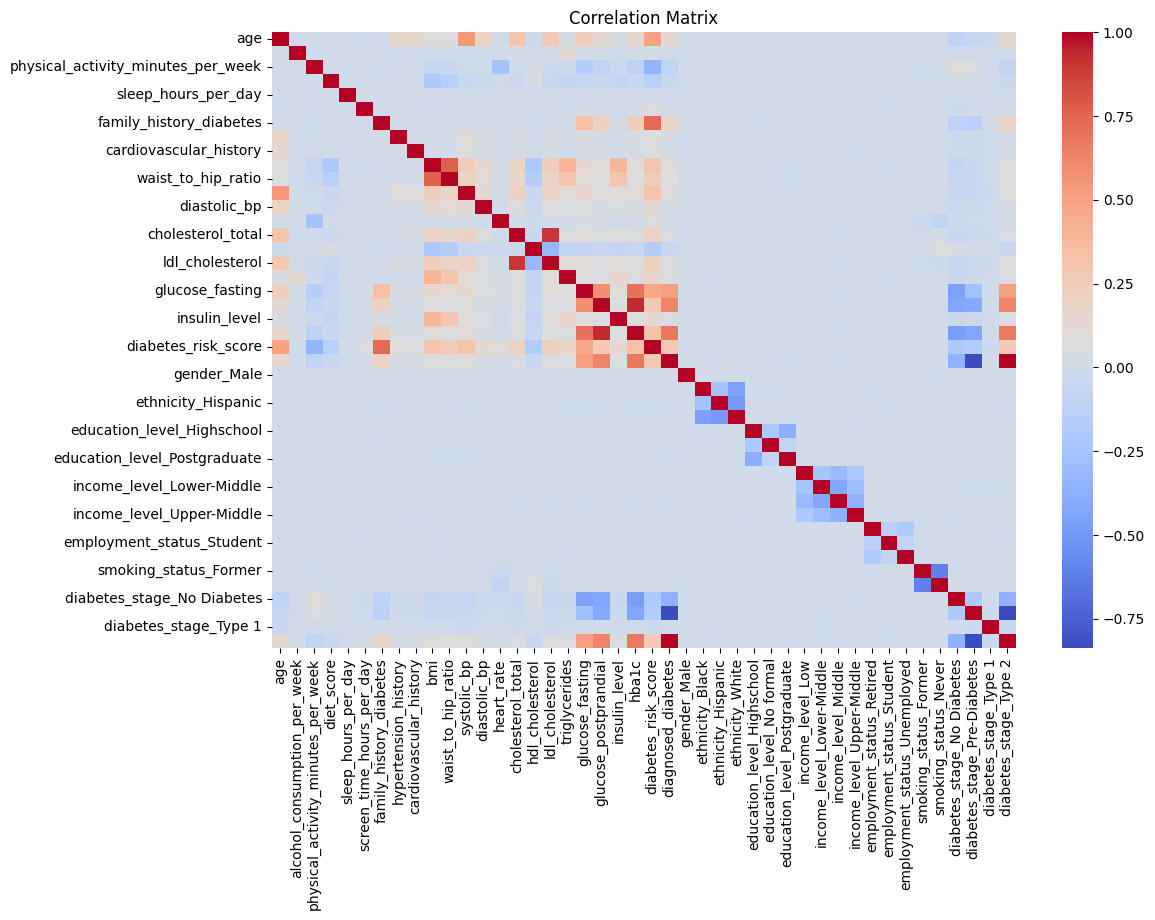

In [ ]:
#find collinearity among variables

plt.figure(figsize=(12,8))
sns.heatmap(diabetes_encoded.corr(), annot=False, cmap='coolwarm')
plt.title("Correlation Matrix")
plt.show()

In [ ]:
#numerical presentation of collinearity

diabetes_encoded.corr()

,age,alcohol_consumption_per_week,physical_activity_minutes_per_week,diet_score,sleep_hours_per_day,screen_time_hours_per_day,family_history_diabetes,hypertension_history,cardiovascular_history,bmi,waist_to_hip_ratio,systolic_bp,diastolic_bp,heart_rate,cholesterol_total,hdl_cholesterol,ldl_cholesterol,triglycerides,glucose_fasting,glucose_postprandial,insulin_level,hba1c,diabetes_risk_score,diagnosed_diabetes,gender_Male,ethnicity_Black,ethnicity_Hispanic,ethnicity_White,education_level_Highschool,education_level_No formal,education_level_Postgraduate,income_level_Low,income_level_Lower-Middle,income_level_Middle,income_level_Upper-Middle,employment_status_Retired,employment_status_Student,employment_status_Unemployed,smoking_status_Former,smoking_status_Never,diabetes_stage_No Diabetes,diabetes_stage_Pre-Diabetes,diabetes_stage_Type 1,diabetes_stage_Type 2
age,1.000000,0.000158,0.001444,-0.003520,-0.003914,-0.005218,-0.003521,0.177822,0.146794,0.091123,0.067757,0.546988,0.195742,0.000108,0.309647,-0.016272,0.281707,0.038595,0.232048,0.131914,0.044151,0.159277,0.495842,0.137212,0.003899,0.004450,0.000713,0.000659,0.001214,-0.001347,-0.001499,0.004196,0.000646,-0.001310,-0.003538,-0.001613,0.000384,0.005683,0.002128,-0.003739,-0.110274,-0.075896,-0.044381,0.141706
alcohol_consumption_per_week,0.000158,1.000000,-0.002582,0.001245,0.001271,0.000204,0.001603,-0.007587,-0.004533,-0.003402,-0.005490,-0.005811,0.000058,0.002946,0.000784,-0.000625,-0.000380,0.125647,0.006706,0.005707,-0.000708,0.006580,0.009137,0.001106,-0.000006,-0.001510,-0.000678,0.002451,-0.000153,-0.001535,-0.001686,-0.000741,0.001669,0.000660,0.000203,0.001317,0.001620,0.002274,0.002067,-0.004044,-0.002370,0.000453,-0.000550,0.000811
physical_activity_minutes_per_week,0.001444,-0.002582,1.000000,-0.002835,-0.005332,0.001439,-0.006902,-0.001351,-0.000236,-0.072602,-0.054130,-0.009491,-0.008163,-0.253369,-0.010243,0.016946,-0.014470,-0.026260,-0.161941,-0.094015,-0.034361,-0.113140,-0.349218,-0.100789,0.000320,-0.001125,0.001886,-0.000536,-0.001416,0.000501,-0.001104,0.001038,-0.003773,-0.000671,0.002853,0.003391,0.003909,-0.002641,-0.006938,0.002752,0.089997,0.052921,-0.000249,-0.100203
diet_score,-0.003520,0.001245,-0.002835,1.000000,0.001529,0.002460,0.000802,0.000941,0.003564,-0.201046,-0.155441,-0.041946,-0.029555,0.000696,-0.038931,0.040574,-0.046296,-0.079199,-0.071219,-0.042980,-0.078765,-0.052863,-0.144302,-0.043650,0.001015,-0.002066,0.003432,-0.004244,0.001442,0.001616,0.000235,0.002997,-0.001515,0.001366,0.000461,-0.004901,0.007430,0.001506,0.004685,-0.007090,0.034806,0.025191,0.000371,-0.043422
sleep_hours_per_day,-0.003914,0.001271,-0.005332,0.001529,1.000000,0.005375,0.004213,0.004752,-0.001236,0.000522,0.000744,-0.001014,-0.002643,0.010596,0.000272,-0.001566,0.000448,-0.003474,0.000468,0.000297,-0.000043,0.001174,0.003300,0.000807,0.002759,-0.001980,-0.001184,0.000577,-0.002690,-0.000835,0.006716,0.000480,0.003367,-0.000616,-0.004947,0.000639,-0.005464,0.001194,-0.004088,0.005055,0.003298,-0.002938,-0.000056,0.001131
screen_time_hours_per_day,-0.005218,0.000204,0.001439,0.002460,0.005375,1.000000,-0.001611,-0.002302,-0.000787,-0.005544,-0.004521,-0.002019,-0.000725,-0.001494,-0.000585,0.000393,-0.000079,-0.005312,0.034236,0.020749,-0.000644,0.024670,0.070323,0.018069,0.007446,0.001513,-0.001021,0.001986,0.000209,-0.000189,0.000023,-0.004010,0.005345,-0.004409,0.004065,0.002811,-0.005447,0.002465,0.002136,-0.000204,-0.020439,-0.006835,0.000085,0.017779
family_history_diabetes,-0.003521,0.001603,-0.006902,0.000802,0.004213,-0.001611,1.000000,0.003060,0.000245,0.000694,0.003046,-0.001060,0.002979,0.004507,-0.004773,-0.007494,-0.001076,0.002022,0.344126,0.204039,0.016873,0.242000,0.732722,0.197403,-0.004593,0.003700,-0.010472,0.006823,-0.005123,-0.000243,0.004015,0.001834,0.000796,0.000459,0.002984,0.003534,-0.000827,-0.004951,-0.001242,0.006140,-0.122952,-0.135007,0.000541,0.196349
hypertension_history,0.177822,-0.007587,-0.001351,0.000941,0.004752,-0

In [ ]:
# delete predictors that share over 0.9 collinearity

corr_matrix = diabetes_encoded.corr().abs()

# threshould setup
threshold = 0.9

# finding predictors to be removed (>0.9 correlation)
upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(bool))
to_drop = [column for column in upper.columns if any(upper[column] > threshold)]

# print the predictors that we removed
print("Columns to drop due to high collinearity:")
to_drop.remove('diabetes_stage_Type 2')
print(to_drop)

# finalize process
diabetes_reduced = diabetes_encoded.drop(columns=to_drop)

# print remaining columns
print("\nColumns remaining:")
print(diabetes_reduced.columns.tolist())

Columns to drop due to high collinearity:
['ldl_cholesterol', 'hba1c']

Columns remaining:
['age', 'alcohol_consumption_per_week', 'physical_activity_minutes_per_week', 'diet_score', 'sleep_hours_per_day', 'screen_time_hours_per_day', 'family_history_diabetes', 'hypertension_history', 'cardiovascular_history', 'bmi', 'waist_to_hip_ratio', 'systolic_bp', 'diastolic_bp', 'heart_rate', 'cholesterol_total', 'hdl_cholesterol', 'triglycerides', 'glucose_fasting', 'glucose_postprandial', 'insulin_level', 'diabetes_risk_score', 'diagnosed_diabetes', 'gender_Male', 'ethnicity_Black', 'ethnicity_Hispanic', 'ethnicity_White', 'education_level_Highschool', 'education_level_No formal', 'education_level_Postgraduate', 'income_level_Low', 'income_level_Lower-Middle', 'income_level_Middle', 'income_level_Upper-Middle', 'employment_status_Retired', 'employment_status_Student', 'employment_status_Unemployed', 'smoking_status_Former', 'smoking_status_Never', 'diabetes_stage_No Diabetes', 'diabetes_stage_

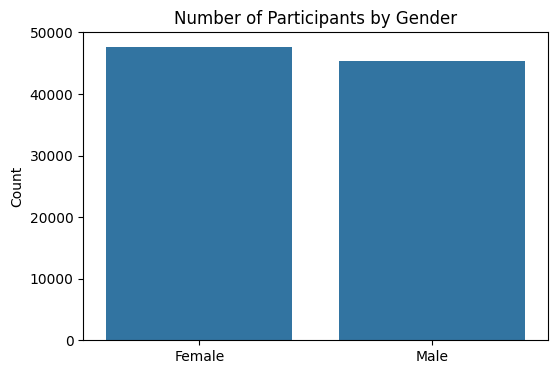

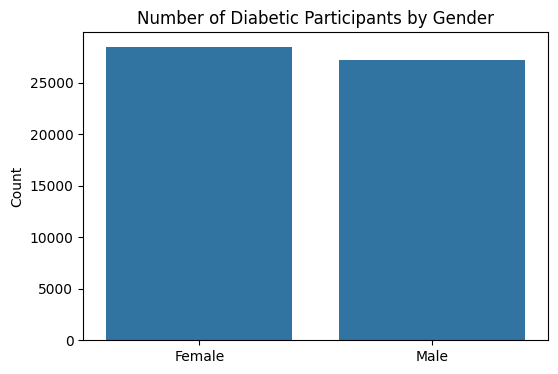

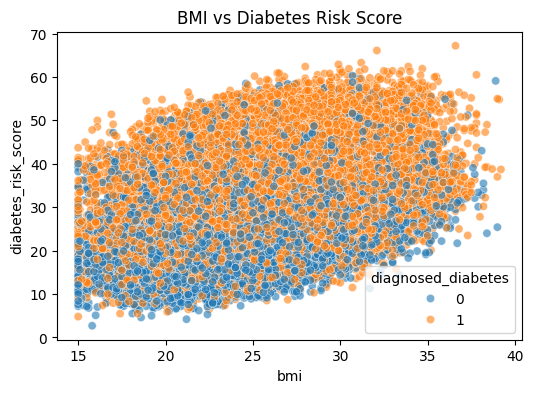

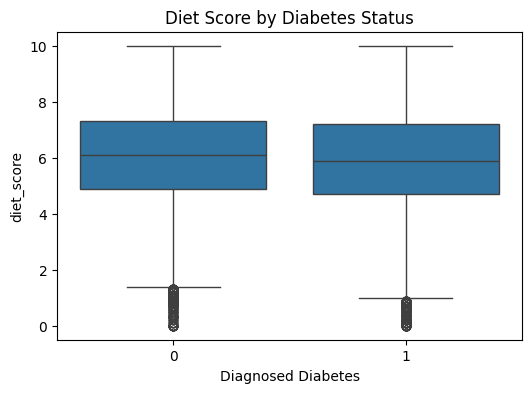

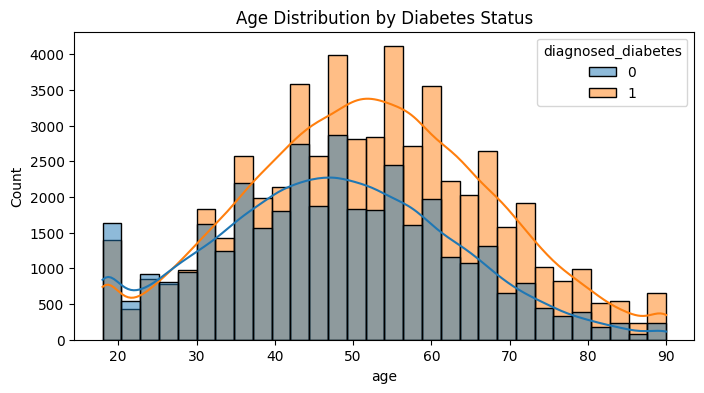

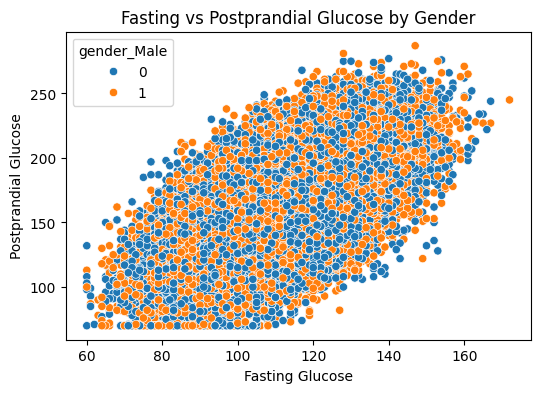

In [ ]:
# visualization:

#1. histogram of how many men and women reported in investigation
plt.figure(figsize=(6,4))
sns.barplot(x=['Female', 'Male'], y=[(diabetes_reduced['gender_Male']==0).sum(), (diabetes_reduced['gender_Male']==1).sum()])
plt.title('Number of Participants by Gender')
plt.ylabel('Count')
plt.show()

# 2. histogram of how many men and women are diagnosed with diabetes.
plt.figure(figsize=(6,4))
sns.barplot(x=['Female', 'Male'],
            y=[diabetes_reduced.loc[diabetes_reduced['gender_Male']==0,'diagnosed_diabetes'].sum(),
               diabetes_reduced.loc[diabetes_reduced['gender_Male']==1,'diagnosed_diabetes'].sum()])
plt.title('Number of Diabetic Participants by Gender')
plt.ylabel('Count')
plt.show()

# 3. BMI vs Diabetes Risk Score scatter plot
plt.figure(figsize=(6,4))
sns.scatterplot(x='bmi', y='diabetes_risk_score', hue='diagnosed_diabetes', data=diabetes_reduced, alpha=0.6)
plt.title('BMI vs Diabetes Risk Score')
plt.show()

# 4. Diet Score by Diabetes Status
plt.figure(figsize=(6,4))
sns.boxplot(x='diagnosed_diabetes', y='diet_score', data=diabetes_reduced)
plt.title('Diet Score by Diabetes Status')
plt.xlabel('Diagnosed Diabetes')
plt.show()

# 5. Age Distribution by Diabetes Status
plt.figure(figsize=(8,4))
sns.histplot(data=diabetes_reduced, x='age', hue='diagnosed_diabetes', bins=30, kde=True)
plt.title('Age Distribution by Diabetes Status')
plt.show()

# 6. Fasting vs Postprandial Glucose by Gender
plt.figure(figsize=(6,4))
sns.scatterplot(x='glucose_fasting', y='glucose_postprandial', hue='gender_Male', data=diabetes_reduced)
plt.title('Fasting vs Postprandial Glucose by Gender')
plt.xlabel('Fasting Glucose')
plt.ylabel('Postprandial Glucose')
plt.show()

In [ ]:
#curious about 'diabetes_stage' vs. 'diagnosed_diabetes'

# Identify one-hot stage columns
stage_cols = [
    'diabetes_stage_No Diabetes',
    'diabetes_stage_Pre-Diabetes',
    'diabetes_stage_Type 1',
    'diabetes_stage_Type 2'
]

# Convert one-hot columns back into a single "stage" label
stage_labels = pd.DataFrame({
    'stage': diabetes_reduced[stage_cols].idxmax(axis=1).str.replace('diabetes_stage_', '')
})

# Create contingency table: stage vs diagnosed_diabetes
alignment_table = pd.crosstab(
    stage_labels['stage'],
    diabetes_reduced['diagnosed_diabetes']
)

alignment_table.columns = ['diagnosed=0', 'diagnosed=1']
alignment_table

,diagnosed=0,diagnosed=1
stage,,
No Diabetes,7519,147
Pre-Diabetes,29725,0
Type 1,50,61
Type 2,0,55541


In [ ]:
# split 20% as the test dataset. (80% training)

X = diabetes_reduced.drop(['diagnosed_diabetes', 'diabetes_risk_score', 'diabetes_stage_No Diabetes', 'diabetes_stage_Pre-Diabetes', 'diabetes_stage_Type 1', 'diabetes_stage_Type 2'], axis=1)

Y = diabetes_reduced['diagnosed_diabetes']

X_train, X_test, Y_train, Y_test = train_test_split(
    X, Y, test_size=0.2, random_state=42, stratify=Y
)

ii. What data pre-processing and feature engineering (or data augmentation) did you complete on your project?

In [ ]:
# perform imputation (replacing outliers with the mean)

def replace_outliers_with_median(df):
    df_copy = df.copy()
    numeric_cols = df_copy.select_dtypes(include=np.number).columns
    for col in numeric_cols:
        Q1 = df_copy[col].quantile(0.25)
        Q3 = df_copy[col].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        median = df_copy[col].median()
        df_copy[col] = np.where((df_copy[col] < lower_bound) | (df_copy[col] > upper_bound), median, df_copy[col])
    return df_copy

# replacing
X_train_clean = replace_outliers_with_median(X_train)
X_test_clean = replace_outliers_with_median(X_test)


Y_train_clean = Y_train.copy()
Y_test_clean = Y_test.copy()

In [ ]:
# data normalization and standardization

#initialize scalar
scaler = MinMaxScaler()
scaler_std = StandardScaler()

X_train_normalized = pd.DataFrame(scaler.fit_transform(X_train_clean),
                            columns=X_train_clean.columns,
                            index=X_train_clean.index)


X_test_normalized = pd.DataFrame(scaler.transform(X_test_clean),
                           columns=X_test_clean.columns,
                           index=X_test_clean.index)

# standardization
X_train_standardized = pd.DataFrame(
    scaler_std.fit_transform(X_train_clean),
    columns=X_train_clean.columns,
    index=X_train_clean.index
)

X_test_standardized = pd.DataFrame(
    scaler_std.transform(X_test_clean),
    columns=X_test_clean.columns,
    index=X_test_clean.index
)

iii. How was regression analysis applied in your project? What did you learn about your dataset from this analysis and were you able to use this analysis for feature importance? Was regularization needed?

**come back to this**

In [ ]:
#Perform Lasso regression analysis

# apply lasso function
lasso_cv = LassoCV(
    alphas=np.logspace(-4, 1, 50),
    cv=5,
    random_state=42
)

lasso_cv.fit(X_train_standardized, Y_train_clean)

print("Best alpha found by LASSO:", lasso_cv.alpha_)
print("Cross-validated R² score:", lasso_cv.score(X_train_standardized, Y_train_clean))


# extract lasso coefficients
coefficients = pd.DataFrame({
    "Feature": X_train_standardized.columns,
    "Coefficient": lasso_cv.coef_
})

# Sort by absolute importance
coefficients["Importance"] = coefficients["Coefficient"].abs()
coefficients_sorted = coefficients.sort_values(by="Importance", ascending=False)

print(coefficients_sorted)

Best alpha found by LASSO: 0.0013257113655901094
Cross-validated R² score: 0.43610776234397897
                               Feature  Coefficient  Importance
18                glucose_postprandial     0.246737    0.246737
17                     glucose_fasting     0.106429    0.106429
0                                  age     0.008924    0.008924
2   physical_activity_minutes_per_week    -0.005769    0.005769
9                                  bmi     0.005670    0.005670
10                  waist_to_hip_ratio     0.002458    0.002458
1         alcohol_consumption_per_week    -0.001332    0.001332
15                     hdl_cholesterol    -0.001327    0.001327
11                         systolic_bp     0.000803    0.000803
16                       triglycerides     0.000646    0.000646
3                           diet_score    -0.000000    0.000000
4                  sleep_hours_per_day    -0.000000    0.000000
8               cardiovascular_history     0.000000    0.000000
5        

In [ ]:
# Evaluate the regression model

Y_pred = lasso_cv.predict(X_test_standardized)

print("Test R2:", r2_score(Y_test_clean, Y_pred))
print("Test MSE:", mean_squared_error(Y_test_clean, Y_pred))


Test R2: 0.42956990214204904
Test MSE: 0.13699724546068404


In [ ]:
# enter ridge regularization here
# do analysis on which one performs better
# go with the higher performing technique

# apply ridge function
ridge_cv = RidgeCV(
    alphas=np.logspace(-4, 1, 50),
    cv=5,
    #random_state=42 does not have random state arg
)

ridge_cv.fit(X_train_standardized, Y_train_clean)

print("Best alpha found by Ridge:", ridge_cv.alpha_)
print("Cross-validated R² score:", ridge_cv.score(X_train_standardized, Y_train_clean))


# extract ridge coefficients
coefficients = pd.DataFrame({
    "Feature": X_train_standardized.columns,
    "Coefficient": ridge_cv.coef_
})

# Sort by absolute importance
coefficients["Importance"] = coefficients["Coefficient"].abs()
coefficients_sorted = coefficients.sort_values(by="Importance", ascending=False)

print(coefficients_sorted)

Best alpha found by Ridge: 10.0
Cross-validated R² score: 0.43619514100204304
                               Feature  Coefficient  Importance
18                glucose_postprandial     0.247512    0.247512
17                     glucose_fasting     0.106700    0.106700
0                                  age     0.009991    0.009991
2   physical_activity_minutes_per_week    -0.006984    0.006984
9                                  bmi     0.005951    0.005951
10                  waist_to_hip_ratio     0.003179    0.003179
1         alcohol_consumption_per_week    -0.002804    0.002804
15                     hdl_cholesterol    -0.002418    0.002418
16                       triglycerides     0.001775    0.001775
19                       insulin_level    -0.001686    0.001686
12                        diastolic_bp    -0.001553    0.001553
11                         systolic_bp     0.001342    0.001342
3                           diet_score    -0.001060    0.001060
20                        

In [ ]:
#evaluate Ridge model
Y_pred = ridge_cv.predict(X_test_standardized)

print("Test R2:", r2_score(Y_test_clean, Y_pred))
print("Test MSE:", mean_squared_error(Y_test_clean, Y_pred))

Test R2: 0.42947865398006235
Test MSE: 0.13701916005967255


LASSO had a slighly higher R squared value and a slighly lower MSE so LASSO performed slighly better but not enough to make a meaningful difference in prediction accuracy. the results are nearly identical for Ridge and LASSO.

iv. How was logistic regression analysis applied in your project? What did you learn about your data set from this analysis and were you able to use this analysis for feature importance? Was regularization needed?

In [62]:
#logistic regression

logreg_cv = LogisticRegressionCV(
    Cs=10,                  # testing 10 inverse regularization strengths
    cv=5,                   # 5-fold cross-validation
    penalty='l1',           # L1 regularization (Lasso)
    solver='saga',          # saga supports L1
    scoring='accuracy',
    max_iter=5000,
    random_state=42
)

logreg_cv.fit(X_train_standardized, Y_train_clean)


print("Best C (inverse of regularization strength) found:", logreg_cv.C_[0])
print("Training accuracy:", logreg_cv.score(X_train_standardized, Y_train_clean))

# Feature importance
coefficients = pd.DataFrame({
    "Feature": X_train_standardized.columns,
    "Coefficient": logreg_cv.coef_[0]
}).sort_values(by="Coefficient", key=abs, ascending=False)

print(coefficients)

# Evaluate on test set
Y_pred = logreg_cv.predict(X_test_standardized)
print("Test Accuracy:", accuracy_score(Y_test_clean, Y_pred))
print("Confusion Matrix:\n", confusion_matrix(Y_test_clean, Y_pred))
print("Classification Report:\n", classification_report(Y_test_clean, Y_pred))

Best C (inverse of regularization strength) found: 0.046415888336127774
Training accuracy: 0.8335706800655615
                               Feature  Coefficient
18                glucose_postprandial     1.958545
17                     glucose_fasting     0.823926
0                                  age     0.076232
2   physical_activity_minutes_per_week    -0.049496
9                                  bmi     0.035069
10                  waist_to_hip_ratio     0.024154
16                       triglycerides     0.018590
15                     hdl_cholesterol    -0.018060
1         alcohol_consumption_per_week    -0.015677
3                           diet_score    -0.011593
11                         systolic_bp     0.010919
12                        diastolic_bp    -0.010779
14                   cholesterol_total     0.008080
20                         gender_Male     0.005739
28           income_level_Lower-Middle     0.005089
7                 hypertension_history    -0.004116
19    

v. How were KNN, decision trees, or random forest used for classification on your data? What method worked best for your data and why was it good for the problem you were addressing?

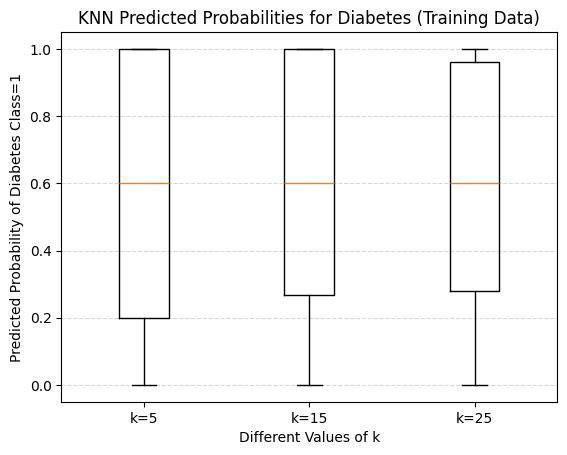

In [ ]:
# KNN

# k-NN for k=5, 15, and 25
knn1 = KNeighborsClassifier(5)
knn1.fit(X_train,Y_train)

knn15 = KNeighborsClassifier(15)
knn15.fit(X_train,Y_train)

knn25 = KNeighborsClassifier(25)
knn25.fit(X_train,Y_train)

plt.boxplot([knn1.predict_proba(X_train)[:,1],
             knn15.predict_proba(X_train)[:,1],knn25.predict_proba(X_train)[:,1]], tick_labels=["k=5", "k=15", "k=25"])

plt.title("KNN Predicted Probabilities for Diabetes (Training Data)")
plt.ylabel("Predicted Probability of Diabetes Class=1")
plt.xlabel("Different Values of k")
plt.grid(axis="y", linestyle="--", alpha=.5)
plt.show()


Changes in k-values do not significantly shift the central tendency of predictions as the median sits close to .6 for k=5,15, and 25.

Variance decreases as k increases, so smaller k value like 5 is more prone to overfitting and a larger vakue such as k is more prone to underfitting. k=15 has more balanced bias/variance and smoother predictions; it is the better performing of the three k values.

In [46]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report, confusion_matrix
from sklearn.model_selection import GridSearchCV

from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier


# define method for model evaluation
def evaluate_model(name, model, X_train, y_train, X_test, y_test):

    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    acc = accuracy_score(y_test, y_pred)
    prec = precision_score(y_test, y_pred, zero_division=0)
    rec = recall_score(y_test, y_pred, zero_division=0)
    f1 = f1_score(y_test, y_pred, zero_division=0)

    print(f"\n===== {name} =====")
    print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
    print("\nClassification Report:\n", classification_report(y_test, y_pred, digits=3))

    return {
        "Model": name,
        "Test Accuracy": acc,
        "Test Precision": prec,
        "Test Recall": rec,
        "Test F1": f1
    }

In [49]:
# KNN needs standardized features
Xtrain_knn = X_train_standardized
Xtest_knn = X_test_standardized

# Trees/forests do NOT need scaling
Xtrain_tree = X_train_clean
Xtest_tree = X_test_clean

ytrain = Y_train_clean
ytest = Y_test_clean

print("Shapes:")
print("KNN X_train:", Xtrain_knn.shape, "X_test:", Xtest_knn.shape)
print("Tree/RF X_train:", Xtrain_tree.shape, "X_test:", Xtest_tree.shape)
print("y_train:", ytrain.shape, "y_test:", ytest.shape)

Shapes:
KNN X_train: (74434, 36) X_test: (18609, 36)
Tree/RF X_train: (74434, 36) X_test: (18609, 36)
y_train: (74434,) y_test: (18609,)


In [50]:
#KNN

knn = KNeighborsClassifier(n_neighbors=15, weights="distance", p=2)
knn_res = evaluate_model("KNN (k=15)", knn, Xtrain_knn, ytrain, Xtest_knn, ytest)


===== KNN (k=15) =====
Confusion Matrix:
 [[5289 2170]
 [1790 9360]]

Classification Report:
               precision    recall  f1-score   support

           0      0.747     0.709     0.728      7459
           1      0.812     0.839     0.825     11150

    accuracy                          0.787     18609
   macro avg      0.779     0.774     0.777     18609
weighted avg      0.786     0.787     0.786     18609



In [51]:
#decision tree

dt = DecisionTreeClassifier(
    random_state=42,
    max_depth=10,
    min_samples_leaf=10
)
dt_res = evaluate_model("Decision Tree", dt, Xtrain_tree, ytrain, Xtest_tree, ytest)


===== Decision Tree =====
Confusion Matrix:
 [[6411 1048]
 [1993 9157]]

Classification Report:
               precision    recall  f1-score   support

           0      0.763     0.859     0.808      7459
           1      0.897     0.821     0.858     11150

    accuracy                          0.837     18609
   macro avg      0.830     0.840     0.833     18609
weighted avg      0.843     0.837     0.838     18609



In [52]:
#random forest

rf = RandomForestClassifier(
    random_state=42,
    n_estimators=300,
    max_depth=None,
    min_samples_leaf=5,
    n_jobs=-1
)
rf_res = evaluate_model("Random Forest", rf, Xtrain_tree, ytrain, Xtest_tree, ytest)


===== Random Forest =====
Confusion Matrix:
 [[6443 1016]
 [1868 9282]]

Classification Report:
               precision    recall  f1-score   support

           0      0.775     0.864     0.817      7459
           1      0.901     0.832     0.866     11150

    accuracy                          0.845     18609
   macro avg      0.838     0.848     0.841     18609
weighted avg      0.851     0.845     0.846     18609



In [53]:
#see all three models in one table

results_df = pd.DataFrame([knn_res, dt_res, rf_res]).sort_values("Test Accuracy", ascending=False)
results_df

,Model,Test Accuracy,Test Precision,Test Recall,Test F1
2,Random Forest,0.845021,0.901340,0.832466,0.865535
1,Decision Tree,0.836584,0.897305,0.821256,0.857598
0,KNN (k=15),0.787200,0.811795,0.839462,0.825397


vi. How were PCA and clustering applied on your data? What method worked best for your data and why was it good for the problem you were addressing?

In [ ]:
# PCA and clustering
# i think it would be interesting to cluster on diabetes_stage rather than diagnosed_diabetes
from sklearn.cluster import AgglomerativeClustering
from sklearn.metrics import adjusted_rand_score
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from mpl_toolkits.mplot3d import Axes3D

In [ ]:
# standardize the data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [ ]:
# PCA
pca = PCA()
X_pca = pca.fit_transform(X_scaled)

In [ ]:
# eigenvalues/variance
exp_var = pca.explained_variance_ratio_
cumulative_var = np.cumsum(exp_var)

print("Explained Variance Ratio:")
print(exp_var)
print("\nCumulative Variance Explained:")
print(cumulative_var)

Explained Variance Ratio:
[0.07822746 0.0493858  0.04493082 0.04355687 0.04331599 0.04025037
 0.03881564 0.03577309 0.03479034 0.03399876 0.03336287 0.0331728
 0.03015488 0.03003429 0.02934317 0.02807498 0.02770827 0.02756787
 0.02720291 0.02674399 0.02646464 0.02594432 0.02565075 0.02297956
 0.0223723  0.02229274 0.02021488 0.01979482 0.01853525 0.01447288
 0.01172228 0.01020482 0.00985398 0.00591111 0.00530067 0.00187383]

Cumulative Variance Explained:
[0.07822746 0.12761327 0.17254409 0.21610096 0.25941695 0.29966732
 0.33848296 0.37425605 0.40904639 0.44304515 0.47640802 0.50958082
 0.53973569 0.56976998 0.59911316 0.62718814 0.65489641 0.68246428
 0.70966718 0.73641117 0.76287581 0.78882012 0.81447087 0.83745044
 0.85982274 0.88211547 0.90233035 0.92212518 0.94066043 0.95513331
 0.96685558 0.9770604  0.98691439 0.99282549 0.99812617 1.        ]


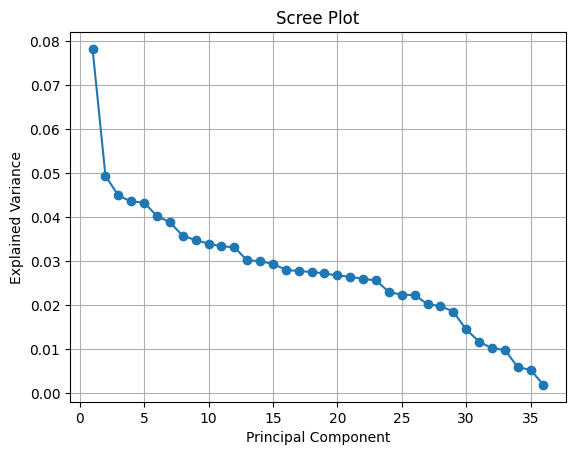

In [ ]:
# scree plot
plt.figure()
plt.plot(np.arange(1, len(exp_var) + 1), exp_var, 'o-')
plt.title('Scree Plot')
plt.xlabel('Principal Component')
plt.ylabel('Explained Variance')
plt.grid()

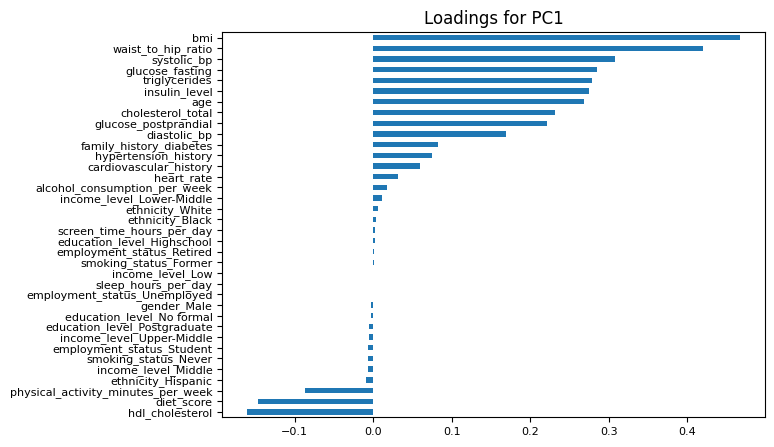

In [55]:
loadings = pd.DataFrame(
    pca.components_.T,
    columns=[f"PC{i+1}" for i in range(pca.n_components_)],
    index=X.columns
)

# looks like most of the variance in PC1 comes from bmi + waist to hip ratio
loadings["PC1"].sort_values().plot(kind="barh", figsize=(7,5), fontsize=8)
plt.title("Loadings for PC1")
plt.show()

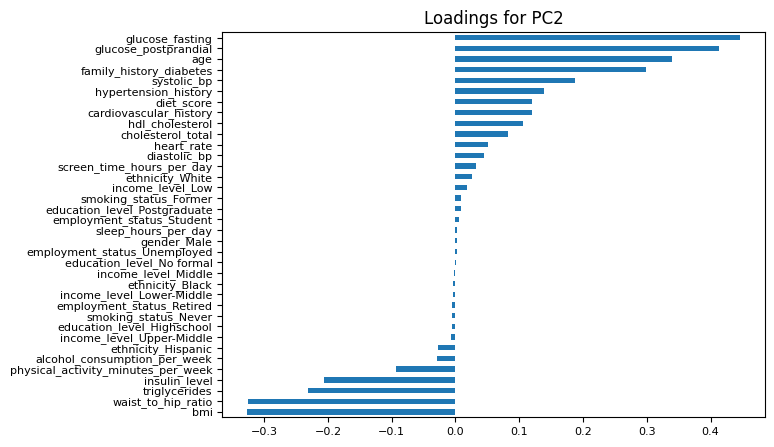

In [54]:
# PC2 comes from glucose (fasting and postprandial)

loadings["PC2"].sort_values().plot(kind="barh", figsize=(7,5), fontsize=8)
plt.title("Loadings for PC2")
plt.show()

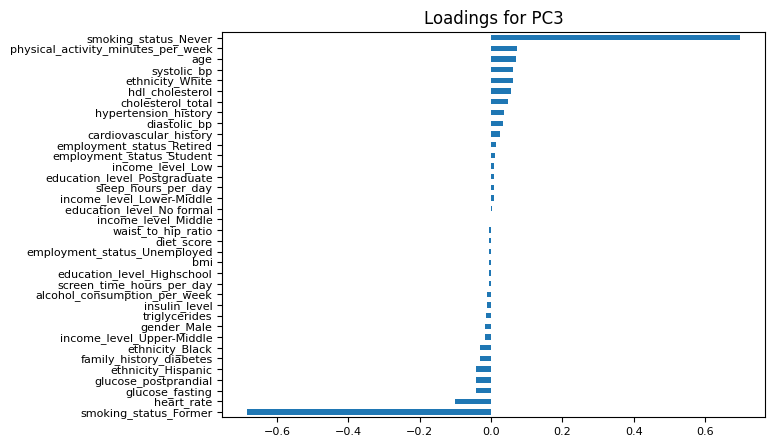

In [56]:
# PC3 comes from smoking status

loadings["PC3"].sort_values().plot(kind="barh", figsize=(7,5), fontsize=8)
plt.title("Loadings for PC3")
plt.show()

In [ ]:
# clustering

kmeans = KMeans(n_clusters=4, random_state=42)
clusters = kmeans.fit_predict(X_scaled)

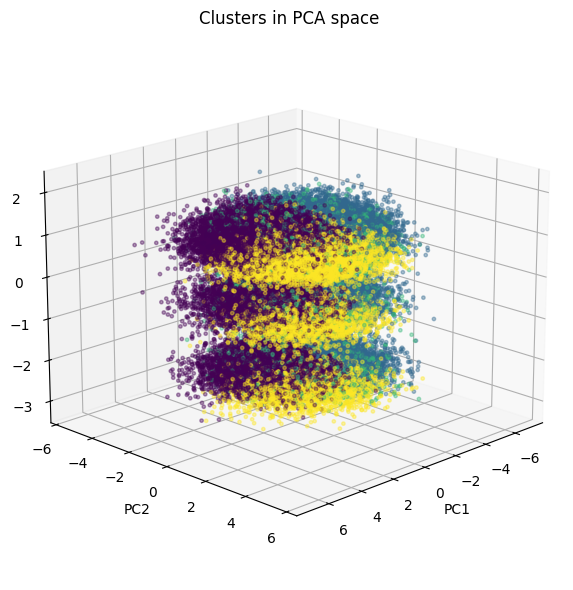

In [61]:
#visualize clusters

fig = plt.figure(figsize=(7, 6))
ax = fig.add_subplot(111, projection="3d")

ax.scatter(
    X_pca[:, 0],
    X_pca[:, 1],
    X_pca[:, 2],
    c=clusters,
    s=6,
    alpha=0.4
)

ax.set_xlabel("PC1", fontsize=10)
ax.set_ylabel("PC2", fontsize=10)
ax.set_zlabel("PC3", fontsize=10)

ax.set_title("Clusters in PCA space", fontsize=12)

ax.view_init(elev=18, azim=45)

plt.tight_layout()
plt.show()

In [ ]:
#see how well these clusters compare to our clinical data (diabetes_stage)

stage_cols = [
    'diabetes_stage_No Diabetes',
    'diabetes_stage_Pre-Diabetes',
    'diabetes_stage_Type 1',
    'diabetes_stage_Type 2'
]

true_labels_stage = diabetes_reduced[stage_cols].idxmax(axis=1)
true_labels_stage_num = pd.Categorical(true_labels_stage).codes

In [ ]:
#use adjusted rand index for evaluating our model

ari = adjusted_rand_score(true_labels_stage_num, clusters)
print("Adjusted Rand Index:", ari)

Adjusted Rand Index: 0.011468923972899312


In [ ]:
#using what we learned from PC1 and PC2 as important features

stage_features = [
    'bmi',
    'glucose_fasting',
    'glucose_postprandial',
    'waist_to_hip_ratio',
]

X_stage = diabetes_reduced[stage_features]
X_stage_scaled = StandardScaler().fit_transform(X_stage)

clusters_stage = KMeans(n_clusters=4, random_state=42).fit_predict(X_stage_scaled)

adjusted_rand_score(true_labels_stage_num, clusters_stage)


0.15139961455517137

vii. Explain how your project attempted to use a neural network on the data and the results of that attempt.

In [ ]:
# preprocessing: scaling the data for NN

from sklearn.datasets import fetch_openml
from sklearn.preprocessing import StandardScaler

X = diabetes_reduced.drop(['diagnosed_diabetes', 'diabetes_risk_score', 'diabetes_stage_No Diabetes', 'diabetes_stage_Pre-Diabetes', 'diabetes_stage_Type 1', 'diabetes_stage_Type 2'], axis=1)
y = diabetes_reduced['diagnosed_diabetes']

X = X.astype(float).values
y = y.astype(int).values

scaler=StandardScaler()

In [ ]:
# split into test/train/validation

from sklearn.model_selection import train_test_split

X_temp, X_test, y_temp, y_test = train_test_split(
    X, y, test_size=.3, random_state=123, stratify=y)

X_train, X_valid, y_train, y_valid = train_test_split(
    X_temp, y_temp, test_size=.5, random_state=123, stratify=y_temp)


# optional to free up some memory by deleting non-used arrays:
del X_temp, y_temp, X, y

In [ ]:
# fit and transform the datasets

from sklearn.preprocessing import StandardScaler

scaler=StandardScaler()
X_train=scaler.fit_transform(X_train)
X_valid=scaler.transform(X_valid)
X_test=scaler.transform(X_test)

In [ ]:
# setting up the tensors and loading the data

import torch
from torch.utils.data import TensorDataset, DataLoader

X_train_t=torch.tensor(X_train, dtype=torch.float32)
y_train_t=torch.tensor(y_train, dtype=torch.float32)

X_valid_t=torch.tensor(X_valid, dtype=torch.float32)
y_valid_t=torch.tensor(y_valid, dtype=torch.float32)

X_test_t=torch.tensor(X_test, dtype=torch.float32)
y_test_t=torch.tensor(y_test, dtype=torch.float32)

train_dataset=TensorDataset(X_train_t, y_train_t)
valid_dataset=TensorDataset(X_valid_t, y_valid_t)
test_dataset=TensorDataset(X_test_t, y_test_t)


train_loader=DataLoader(train_dataset, batch_size=32, shuffle=True)
valid_loader=DataLoader(valid_dataset, batch_size=32, shuffle=False)
test_loader=DataLoader(test_dataset, batch_size=32, shuffle=False)


In [ ]:
# Neural Network

import torch.nn as nn
class DiabetesNN(nn.Module):
  def __init__(self, input_dim):
    super().__init__()
    self.model=nn.Sequential(
        nn.Linear(input_dim,64),
        nn.ReLU(),
        nn.Linear(64,32),
        nn.ReLU(),
        nn.Linear(32,1)
    )

  def forward(self,x):
    return self.model(x)

In [ ]:
# feeding input dimensions into the model

input_dim=X_train.shape[1]
model=DiabetesNN(input_dim)

In [ ]:
# loss and optimization functions

loss_fn=nn.BCEWithLogitsLoss()
optimizer=torch.optim.Adam(model.parameters(), lr=1e-2)
print(model)

DiabetesNN(
  (model): Sequential(
    (0): Linear(in_features=36, out_features=64, bias=True)
    (1): ReLU()
    (2): Linear(in_features=64, out_features=32, bias=True)
    (3): ReLU()
    (4): Linear(in_features=32, out_features=1, bias=True)
  )
)


In [ ]:
# training NN

epochs=15

for epoch in range(epochs):
  model.train()
  running_loss=0.0
  correct=0
  total=0

  for features, labels in train_loader:
    labels=labels.unsqueeze(1)

    outputs=model(features)
    loss=loss_fn(outputs,labels)

    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

    running_loss += loss.item()

    probs=torch.sigmoid(outputs)
    preds=(probs >= .5).float()
    correct += (preds == labels).sum().item()
    total+=labels.size(0)


  train_loss=running_loss/len(train_loader)
  train_acc= 100*correct/total

  print(f"Epoch {epoch+1}/{epochs}- "
      f"Loss: {train_loss:.4f} - "
      f"Accuracy: {train_acc:.2f}%"
      )

Epoch 1/15- Loss: 0.3698 - Accuracy: 83.31%
Epoch 2/15- Loss: 0.3523 - Accuracy: 84.11%
Epoch 3/15- Loss: 0.3487 - Accuracy: 84.42%
Epoch 4/15- Loss: 0.3459 - Accuracy: 84.46%
Epoch 5/15- Loss: 0.3445 - Accuracy: 84.50%
Epoch 6/15- Loss: 0.3415 - Accuracy: 84.74%
Epoch 7/15- Loss: 0.3402 - Accuracy: 84.84%
Epoch 8/15- Loss: 0.3380 - Accuracy: 85.02%
Epoch 9/15- Loss: 0.3356 - Accuracy: 85.13%
Epoch 10/15- Loss: 0.3350 - Accuracy: 85.09%
Epoch 11/15- Loss: 0.3326 - Accuracy: 85.23%
Epoch 12/15- Loss: 0.3293 - Accuracy: 85.37%
Epoch 13/15- Loss: 0.3284 - Accuracy: 85.29%
Epoch 14/15- Loss: 0.3272 - Accuracy: 85.50%
Epoch 15/15- Loss: 0.3248 - Accuracy: 85.59%


In [ ]:
# evaluation of NN

model.eval()
test_loss=0.0
correct = 0
total = 0

with torch.no_grad():
    for features,labels in test_loader:
      labels=labels.unsqueeze(1)

      outputs=model(features)
      loss=loss_fn(outputs,labels)

      test_loss += loss.item()

      probs=torch.sigmoid(outputs)
      preds=(probs >= .5).float()
      correct += (preds == labels).sum().item()
      total+=labels.size(0)


avg_test_loss=test_loss/len(test_loader)
test_acc= 100*correct/total


print(f"Test Loss: {avg_test_loss:.4f}%")
print(f"Test Accuracy: {test_acc:.2f}%")

Test Loss: 0.3709%
Test Accuracy: 83.46%


In [ ]:
#evaluating on validation set of NN

model.eval()
valid_loss=0.0
valid_correct=0
valid_total=0

with torch.no_grad():
    for features,labels in valid_loader:
      labels=labels.unsqueeze(1)

      outputs=model(features)
      loss=loss_fn(outputs,labels)

      valid_loss += loss.item()

      probs=torch.sigmoid(outputs)
      preds=(probs >= .5).float()
      valid_correct += (preds == labels).sum().item()
      valid_total+=labels.size(0)


avg_valid_loss=valid_loss/len(valid_loader)
valid_acc= 100*valid_correct/valid_total


print(f"Valid Loss: {avg_valid_loss:.4f}%")
print(f"Valid Accuracy: {valid_acc:.2f}%")

Valid Loss: 0.3736%
Valid Accuracy: 83.30%
